In [1]:
import requests
from bs4 import BeautifulSoup
from random import randint
import time
import json
import pandas as pd
import re

### Парсинг

In [ ]:
def get_correct_response(max_retries = 3, delay = 1):

  retries = 0

  while retries < max_retries:
    number = randint(600000, 1100000)
    url = f'https://www.labirint.ru/books/{number}/'
    response = requests.get(url)

    if response.status_code == 200:
      return {'response': response,
              'url': url}
    else:
      print(f'Ошибка получения данных с веб-страницы: {url}. Код ошибки: {response.status_code}. Попытка {retries + 1} из {max_retries}')
      retries +=1
      time.sleep(delay)

  print("Не удалось выполнить функцию после нескольких попыток.")
  return {'response': None,
          'url': None}

# get_correct_response()

In [ ]:
parsed_data = []
i = 0

while i != 1300:

  if i % 10 == 0:
    print(f'Количество обработанных веб-страниц: {i}')

  web_page_data = get_correct_response()
  response = web_page_data['response']
  url = web_page_data['url']

  # Проверяем, если response равно None, то пропускаем оставшуюся часть цикла
  if response is None:
    # Увеличиваем i, даже если пропускаем остальную часть цикла
    i += 1
    continue

  soup = BeautifulSoup(response.text, 'html.parser')

  try:
    # 1. Получаем аннотацию
    annotation_div = soup.find('div', class_ = '_content_eijg8_12')
    annotation = annotation_div.get_text() if annotation_div else None
  except Exception:
    annotation = None
    print(f'Ошибка парсинга аннтоации: {url}')

  try:
    # 2. Получаем рейтинг
    rating_value = soup.find('meta', itemprop='ratingValue')
    rating_value = rating_value['content'] if rating_value else None
  except Exception:
    rating_value = None
    print(f'Ошибка парсинга рейтинга: {url}')


  try:
    # 3. Получаем количество оценок
    rating_count = soup.find('meta', itemprop = 'ratingCount')
    rating_count = rating_count['content'] if rating_count else None
  except Exception:
    rating_count = None
    print(f'Ошибка парсинга количества оценок: {url}')


  try:
    # 4. Получаем количество рецензий
    review_count = soup.find('meta', itemprop='reviewCount')
    review_count = review_count['content'] if review_count else None
  except Exception:
    review_count = None
    print(f'Ошибка парсинга количества рецензий: {url}')

  parsed_data.append({
                       'Annotation': annotation,
                       'Rating Value': rating_value,
                       'Rating Count': rating_count,
                       'Review Count':review_count,
                       'URL': url
                         })

  time.sleep(0.5)
  i +=1

try:
  with open('/content/drive/MyDrive/Otus/parsed_data.json', 'w', encoding='utf-8') as f:
    json.dump(parsed_data, f, ensure_ascii=False, indent=4)
except Exception:
  print('Ошибка сохранения данных в json-файл!')

# parsed_data

Количество обработанных веб-страниц: 0
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1099435/. Код ошибки: 404. Попытка 1 из 3
Количество обработанных веб-страниц: 10
Количество обработанных веб-страниц: 20
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1078062/. Код ошибки: 404. Попытка 1 из 3
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1091685/. Код ошибки: 404. Попытка 1 из 3
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1049083/. Код ошибки: 404. Попытка 1 из 3
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1054250/. Код ошибки: 404. Попытка 1 из 3
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1047648/. Код ошибки: 404. Попытка 2 из 3
Количество обработанных веб-страниц: 30
Ошибка получения данных с веб-страницы: https://www.labirint.ru/books/1052137/. Код ошибки: 404. Попытка 1 из 3
Количество обработанных веб-страниц: 40
Ошибка получения 

### Очистка собранных данных

In [2]:
with  open('/content/drive/MyDrive/Otus/parsed_data.json', 'r', encoding='utf-8') as f:
  data = json.load(f)

In [3]:
df = pd.DataFrame(data)
df.head()

,Annotation,Rating Value,Rating Count,Review Count,URL
0,Роман одного из самых талантливых и самобытных...,3.8,30,12,https://www.labirint.ru/books/761276/
1,"Учебный курс ""Я сдам ЕГЭ!"" создан авторским ко...",5,1,1,https://www.labirint.ru/books/657962/
2,Vieni anche tu nella fattoria di Poppy e Sam e...,0,0,0,https://www.labirint.ru/books/781206/
3,"In this engaging sequel to the picture book, L...",3.5,1,2,https://www.labirint.ru/books/688443/
4,Как в последние 15 лет в России менялись инсти...,5,1,0,https://www.labirint.ru/books/1013317/


In [4]:
df.shape

(1289, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Annotation    1242 non-null   object
 1   Rating Value  1245 non-null   object
 2   Rating Count  1245 non-null   object
 3   Review Count  1245 non-null   object
 4   URL           1289 non-null   object
dtypes: object(5)
memory usage: 50.5+ KB


In [6]:
df.isna().sum()

,0
Annotation,47
Rating Value,44
Rating Count,44
Review Count,44
URL,0


In [7]:
df = df.dropna(axis='rows')

In [8]:
df['Annotation'] = df['Annotation'].astype('str')
df['Rating Value'] = df['Rating Value'].astype('float')
df['Rating Count'] = df['Rating Count'].astype('float')
df['Review Count'] = df['Review Count'].astype('int')

<ipython-input-8-c4a8f0f3cc25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annotation'] = df['Annotation'].astype('str')
<ipython-input-8-c4a8f0f3cc25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating Value'] = df['Rating Value'].astype('float')
<ipython-input-8-c4a8f0f3cc25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [9]:
df.loc[df['Rating Value'] == 0].shape

(619, 5)

In [10]:
# Удалим аннотации, с нулевым рейтингом
df = df.loc[df['Rating Value'] != 0].reset_index(drop=True)
df.head()

,Annotation,Rating Value,Rating Count,Review Count,URL
0,Роман одного из самых талантливых и самобытных...,3.8,30.0,12,https://www.labirint.ru/books/761276/
1,"Учебный курс ""Я сдам ЕГЭ!"" создан авторским ко...",5.0,1.0,1,https://www.labirint.ru/books/657962/
2,"In this engaging sequel to the picture book, L...",3.5,1.0,2,https://www.labirint.ru/books/688443/
3,Как в последние 15 лет в России менялись инсти...,5.0,1.0,0,https://www.labirint.ru/books/1013317/
4,James Joyce`s Portrait of an Artist is one of ...,5.0,1.0,2,https://www.labirint.ru/books/958799/


In [11]:
# Функция для проверки наличия английских букв в строке
def contains_english(text):
    return bool(re.search('[a-zA-Z]', text))

In [12]:
# Удаляем строки, содержащие английский текст
df = df[~df['Annotation'].apply(contains_english)]
df = df.drop(['URL'], axis=1)
df.head()

,Annotation,Rating Value,Rating Count,Review Count
0,Роман одного из самых талантливых и самобытных...,3.8,30.0,12
1,"Учебный курс ""Я сдам ЕГЭ!"" создан авторским ко...",5.0,1.0,1
3,Как в последние 15 лет в России менялись инсти...,5.0,1.0,0
6,Эта книга - пособие для менеджеров-кадровиков....,4.0,3.0,1
7,В двадцать втором веке человечество достигло г...,4.6,17.0,6


In [13]:
df.shape

(473, 4)

### Предобработка текста

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 621
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Annotation    473 non-null    object 
 1   Rating Value  473 non-null    float64
 2   Rating Count  473 non-null    float64
 3   Review Count  473 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 18.5+ KB


#### Токенизация
Первый шаг предобработки - разбить текст на единицы, с которыми мы будем работать. Эти юниты называются **токенами (tokens)**, а процесс - **токенизация (tokenization)**. В большинстве случаев в качестве токенов используют слова, но иногда работают с буквами.

Сегодня на вебинаре мы будем работать со словами. Проще всего разбить текст на слова по пробелам (не забывая про пунктуацию).


#### Удаляем стоп-слова


**Стоп-слова** – это слова, которые выкидываются из текста при обработке текста. Когда мы применяем машинное обучение к текстам, **такие слова могут добавить много шума**, поэтому необходимо избавляться от нерелевантных слов.

**Стоп-слова это обычно понимают артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки**. При этом надо понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая.





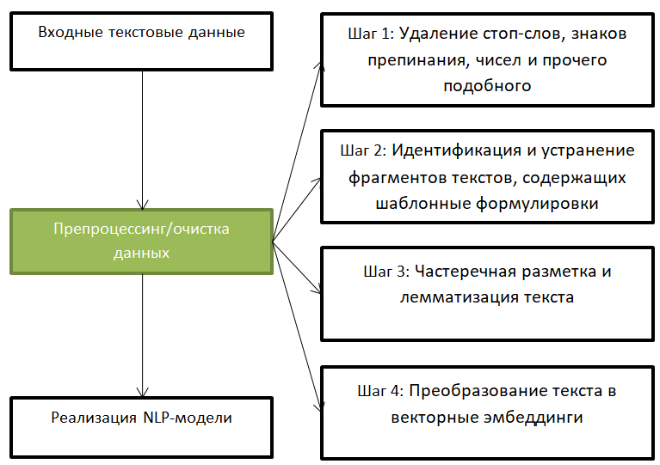

#### Очистка текста

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['и', 'в', 'во', 'не', 'что']

In [17]:
tokenizer = nltk.WordPunctTokenizer()

In [18]:
df['Annotation'][0]

'Роман одного из самых талантливых и самобытных франкоязычных писателей нового поколения. Критики неслучайно назвали Томаса Гунцига "внучатым племянником Кафки". Гунциг погружает нас в гротескный мир супермаркетов, где пересекаются и ломаются судьбы главных героев. В этом мире люди имеют возможность генетически манипулировать будущими детьми. Так кассирша супермаркета становится матерью четырех людей-волков - Белого, Бурого, Серого и Черного. Головокружительные приключения, яркие герои, порой жестокие и циничные, короткие главы, крутые повороты сюжета, - все это делает роман похожим на остросюжетный триллер, который стремительно движется к непредсказуемому финалу.В начале не было ничего.Ни пространства, ни света, ни течения времени. Не было ни вчера, ни завтра, ни сегодня.Хуже забастовки.Хуже дефицита.Ничего - и больше ничего, но ничего страшного, в конце концов, ничего - это тоже неплохо.Ничего - все же открывает какие-никакие перспективы.Ведь то...Развернуть'

In [19]:
tokenizer.tokenize(df['Annotation'][0])

['Роман',
 'одного',
 'из',
 'самых',
 'талантливых',
 'и',
 'самобытных',
 'франкоязычных',
 'писателей',
 'нового',
 'поколения',
 '.',
 'Критики',
 'неслучайно',
 'назвали',
 'Томаса',
 'Гунцига',
 '"',
 'внучатым',
 'племянником',
 'Кафки',
 '".',
 'Гунциг',
 'погружает',
 'нас',
 'в',
 'гротескный',
 'мир',
 'супермаркетов',
 ',',
 'где',
 'пересекаются',
 'и',
 'ломаются',
 'судьбы',
 'главных',
 'героев',
 '.',
 'В',
 'этом',
 'мире',
 'люди',
 'имеют',
 'возможность',
 'генетически',
 'манипулировать',
 'будущими',
 'детьми',
 '.',
 'Так',
 'кассирша',
 'супермаркета',
 'становится',
 'матерью',
 'четырех',
 'людей',
 '-',
 'волков',
 '-',
 'Белого',
 ',',
 'Бурого',
 ',',
 'Серого',
 'и',
 'Черного',
 '.',
 'Головокружительные',
 'приключения',
 ',',
 'яркие',
 'герои',
 ',',
 'порой',
 'жестокие',
 'и',
 'циничные',
 ',',
 'короткие',
 'главы',
 ',',
 'крутые',
 'повороты',
 'сюжета',
 ',',
 '-',
 'все',
 'это',
 'делает',
 'роман',
 'похожим',
 'на',
 'остросюжетный',
 'трил

In [20]:
def clean_text(raw_text):

  # HTML-теги: первый шаг - удалить из входного текста все HTML-теги
  clean_text = re.sub('<[^<]+?>', ' ', raw_text)

  # URL и ссылки: далее - удаляем из текста все URL и ссылки
  clean_text = re.sub(r'http\S+', ' ', clean_text)

  # Используем регулярное выражение для удаления всех знаков пунктуации
  # re.sub(r'[^\w\s]', '', text) — это регулярное выражение, которое заменяет все символы, не являющиеся:

  # \w — буквами (латинскими и кириллическими) и цифрами.
  # \s — пробелами
  clean_text = re.sub(r'[^\w\s]', ' ', clean_text)

  # Приводим все входные данные к нижнему регистру
  clean_text = clean_text.lower()

  # Удаляем размеры (например, 124х80, 140х205 мм)
  clean_text = re.sub(r'\d+х\d+', '', clean_text)

  # Удаляем стоп слова и числа
  clean_text = ' '.join([word for word in tokenizer.tokenize(clean_text) if (word not in set(stop_words) and not word.isnumeric())])

  # Убираем все пробелы
  # Так как все данные теперь представлены словами - удалим пробелы
  clean_text = re.sub('\s+', ' ', clean_text)
  return clean_text

clean_text(df['Annotation'][0])

'роман одного самых талантливых самобытных франкоязычных писателей нового поколения критики неслучайно назвали томаса гунцига внучатым племянником кафки гунциг погружает гротескный мир супермаркетов пересекаются ломаются судьбы главных героев мире люди имеют возможность генетически манипулировать будущими детьми кассирша супермаркета становится матерью четырех людей волков белого бурого серого черного головокружительные приключения яркие герои порой жестокие циничные короткие главы крутые повороты сюжета это делает роман похожим остросюжетный триллер который стремительно движется непредсказуемому финалу начале пространства света течения времени вчера завтра сегодня хуже забастовки хуже дефицита страшного конце концов это неплохо открывает какие никакие перспективы развернуть'

In [21]:
clean_text(df['Annotation'][1])

'учебный курс сдам егэ создан авторским коллективом числа членов федеральной комиссии разработке контрольных измерительных материалов егэ экспертов егэ математике профильного уровня включает пособия курс самоподготовки технология решения заданий типовые задания учебное пособие курс самоподготовки технология решения заданий состоит трёх частей алгебра алгебра начала математического анализа геометрия предназначено эффективной организации подготовки обучающихся классов государственной итоговой аттестации пособии приведены темы занятий дана краткая характеристика экзаменационной работы общие рекомендации разным аспектам курса конкретные разработки рамках тематических модулей которые построены соответствии логикой экзаменационной работы пособие адресовано школьникам родителям педагогам проверки самопроверки достижения требований образовательного стандарта уровню подготовки выпускников е развернуть'

In [22]:
df['Cleaned annotation'] = df['Annotation'].apply(clean_text)
df['Cleaned annotation'].head()

,Cleaned annotation
0,роман одного самых талантливых самобытных фран...
1,учебный курс сдам егэ создан авторским коллект...
3,последние лет россии менялись институт выборов...
6,эта книга пособие менеджеров кадровиков помощь...
7,двадцать втором веке человечество достигло гра...


In [23]:
df.head()

,Annotation,Rating Value,Rating Count,Review Count,Cleaned annotation
0,Роман одного из самых талантливых и самобытных...,3.8,30.0,12,роман одного самых талантливых самобытных фран...
1,"Учебный курс ""Я сдам ЕГЭ!"" создан авторским ко...",5.0,1.0,1,учебный курс сдам егэ создан авторским коллект...
3,Как в последние 15 лет в России менялись инсти...,5.0,1.0,0,последние лет россии менялись институт выборов...
6,Эта книга - пособие для менеджеров-кадровиков....,4.0,3.0,1,эта книга пособие менеджеров кадровиков помощь...
7,В двадцать втором веке человечество достигло г...,4.6,17.0,6,двадцать втором веке человечество достигло гра...


#### Лемматизация

In [24]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 41.4 MB/s eta 0:00:00


In [25]:
# загружаем библиотеку для лемматизации
import pymorphy3 # Морфологический анализатор

# инициализируем лемматизатор :)
morph = pymorphy3.MorphAnalyzer()

In [26]:
morph.parse('студентам')[0].normal_form

'студент'

In [27]:
df['Cleaned annotation'][0]

'роман одного самых талантливых самобытных франкоязычных писателей нового поколения критики неслучайно назвали томаса гунцига внучатым племянником кафки гунциг погружает гротескный мир супермаркетов пересекаются ломаются судьбы главных героев мире люди имеют возможность генетически манипулировать будущими детьми кассирша супермаркета становится матерью четырех людей волков белого бурого серого черного головокружительные приключения яркие герои порой жестокие циничные короткие главы крутые повороты сюжета это делает роман похожим остросюжетный триллер который стремительно движется непредсказуемому финалу начале пространства света течения времени вчера завтра сегодня хуже забастовки хуже дефицита страшного конце концов это неплохо открывает какие никакие перспективы развернуть'

In [28]:
def lemmatize(cleaned_text):
  words = tokenizer.tokenize(cleaned_text)
  lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
  return ' '.join(lemmatized_words)

lemmatize(df['Cleaned annotation'][0])

'роман один самый талантливый самобытный франкоязычный писатель новый поколение критика неслучайно назвать томас гунциго внучатый племянник кафка гунциг погружать гротескный мир супермаркет пересекаться ломаться судьба главный герой мир человек иметь возможность генетически манипулировать будущий ребёнок кассирша супермаркет становиться мать четыре человек волков белый бурый серый чёрный головокружительный приключение яркий герой порой жестокий циничный короткий глава крутой поворот сюжет это делать роман похожий остросюжетный триллер который стремительно двигаться непредсказуемый финал начало пространство свет течение время вчера завтра сегодня плохой забастовка плохой дефицит страшный конец конец это неплохо открывать какой никакой перспектива развернуть'

In [29]:
df['Lemmatized annotation'] = df['Cleaned annotation'].apply(lemmatize)

In [30]:
df = df.drop(['Annotation', 'Cleaned annotation'], axis =1)
df.head()

,Rating Value,Rating Count,Review Count,Lemmatized annotation
0,3.8,30.0,12,роман один самый талантливый самобытный франко...
1,5.0,1.0,1,учебный курс сдать егэ создать авторский колле...
3,5.0,1.0,0,последний год россия меняться институт выборы ...
6,4.0,3.0,1,этот книга пособие менеджер кадровик помощь ун...
7,4.6,17.0,6,двадцать второй век человечество достигнуть гр...


In [31]:
df['Lemmatized annotation'] = df['Lemmatized annotation'].astype(str)
# df['Lemmatized annotation']  = df['Lemmatized annotation'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 621
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating Value           473 non-null    float64
 1   Rating Count           473 non-null    float64
 2   Review Count           473 non-null    int64  
 3   Lemmatized annotation  473 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 34.6+ KB


### Обучение

In [32]:
#Инициализируем векторайзер
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

In [33]:
# Отделяем целевую переменную
X = df.drop('Rating Value', axis = 1)
y = df['Rating Value']
X.shape, y.shape

((473, 3), (473,))

In [34]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [35]:
X_train

,Rating Count,Review Count,Lemmatized annotation
0,2.0,1,книга представить курс комплексный литературно...
1,5.0,2,роман улисс великий ирландский писатель джеймс...
2,23.0,2,автор эмоциональный триггер дэвид ричо предлаг...
3,3.0,1,скетчбук бумага офсет плотность г м2 количеств...
4,2.0,1,дорогой родитель думать сталкиваться поиск отв...
...,...,...,...
397,19.0,14,вернуться прошлое исправить сделать ошибка док...
398,4.0,3,джейн райленд опальный журналистка обратиться ...
399,5.0,2,книга собрать рецепт двадцать традиционный блю...
400,2.0,2,екатеринбург пропасть частный рейсовый автобус...


In [54]:
# Инициализируем TF-IDF векторизатор
vectorizer = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 2),
                             norm = None,
                             min_df = 5, # Термины, которые встречаются меньше чем в 5 документах, будут исключены из векторизации.
                             max_df = 30) # Термины, которые встречаются больше чем в 30 документах, будут исключены из векторизации.

X_train_vectors = vectorizer.fit_transform(X_train['Lemmatized annotation'])

X_train_vectors.shape

(402, 960)

In [55]:
# Преобразование разреженной матрицы в DataFrame
X_train_tfidf = pd.DataFrame(X_train_vectors.toarray(), columns=vectorizer.get_feature_names_out())
X_train_tfidf.head()

,а4,а5,автор книга,авторский,адресовать,актуальный,александр,американский,американский писатель,анализ,...,энциклопедия,эпоха,этот книга,эффективно,эффективный,юмор,юный,явление,являться,яркий
0,0.0,0.0,0.0,0.000000,4.290886,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,4.359879,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.207177,0.0,3.863442
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,10.106053,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [56]:
X_train_tfidf.shape

(402, 960)

In [57]:
# Если индексы не совпадают, сбрасываем их
X_train_tfidf = X_train_tfidf.reset_index(drop=True)
X_train_numeric = X_train[['Rating Count', 'Review Count']].reset_index(drop=True)

In [58]:
# Объединение с исходными признаками
X_train_final = pd.concat([X_train[['Rating Count', 'Review Count']], X_train_tfidf], axis=1)
X_train_final.head()

,Rating Count,Review Count,а4,а5,автор книга,авторский,адресовать,актуальный,александр,американский,...,энциклопедия,эпоха,этот книга,эффективно,эффективный,юмор,юный,явление,являться,яркий
0,2.0,1,0.0,0.0,0.0,0.000000,4.290886,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,5.0,2,0.0,0.0,0.0,4.359879,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.207177,0.0,3.863442
2,23.0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,3.0,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,2.0,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,10.106053,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [59]:
X_train_final.shape

(402, 962)

In [60]:
# Топ-150 слов
vectorizer.get_feature_names_out()[:100]

array(['а4', 'а5', 'автор книга', 'авторский', 'адресовать', 'актуальный',
       'александр', 'американский', 'американский писатель', 'анализ',
       'английский', 'английский язык', 'аспект', 'ассортимент',
       'атмосфера', 'аттестация', 'беда', 'бежать', 'белый', 'берег',
       'бизнес', 'благодаря', 'близкий', 'блок', 'блок офсет', 'блокнот',
       'бог', 'бой', 'боль', 'больший', 'большой', 'борьба', 'брат',
       'брать', 'будущее', 'буква', 'бумага', 'бумага офсет', 'бывать',
       'бывший', 'быть издание', 'важный', 'вариант', 'ваш', 'век',
       'великий', 'вера', 'верный', 'вести', 'весь мир', 'весёлый',
       'вещь', 'взгляд', 'взрослый', 'взрослый ребёнок', 'взять',
       'взяться', 'вид', 'видеть', 'вина', 'включать', 'включить',
       'власть', 'влияние', 'вместе', 'внешний', 'внимание', 'внутренний',
       'внутренний блок', 'внутри', 'военный', 'возвращаться',
       'возможность', 'война', 'войти', 'вокруг', 'волна', 'волшебный',
       'воображение', 'во

In [61]:
X_test_vectors = vectorizer.transform(X_test['Lemmatized annotation'])
X_test_vectors.shape

(71, 960)

In [62]:
# Преобразование разреженной матрицы в DataFrame
X_test_tfidf = pd.DataFrame(X_test_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Объединение с числовыми признаками
X_test_final = pd.concat([X_test[['Rating Count', 'Review Count']], X_test_tfidf], axis=1)

# Вывод результата
X_test_final.head()

,Rating Count,Review Count,а4,а5,автор книга,авторский,адресовать,актуальный,александр,американский,...,энциклопедия,эпоха,этот книга,эффективно,эффективный,юмор,юный,явление,являться,яркий
0,14.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.863442
2,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.003204,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [64]:
X_test_final.shape

(71, 962)

In [104]:
# Инициализация модели
# model = RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Будем использовать градиентный бустинг
model = GradientBoostingRegressor(
                                    n_estimators=100,  # Количество деревьев (аналог эпох)
                                    learning_rate=0.1,  # Скорость обучения
                                    max_depth=5,        # Максимальная глубина дерева
                                    random_state=42
                                )

In [105]:
# Применим кросс-валидацию для обучния модели
kf = KFold(n_splits=5, shuffle = True, random_state = 42)

In [106]:
# Метрика для оценки (средняя квадратичная ошибка)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [107]:
y_train.shape

(402,)

In [108]:
# Кросс-валидация на тренировочных данных
cv_scores = cross_val_score(model, X_train_final, y_train, cv=kf, scoring=scorer)

In [109]:
# Вывод результатов кросс-валидации
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [-1.06510307 -1.31893097 -1.92253993 -1.34413773 -1.58628302]
Mean CV score: -1.447398943086232
Standard deviation of CV scores: 0.2892627781550527


In [110]:
# Обучение модели на всех тренировочных данных
model.fit(X_train_final, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [128]:
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

In [131]:
# Вычисление ошибок MSE
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print('Train MSE', train_error)
print('Test MSE', test_error)

Train MSE 0.11611701676453273
Test MSE 0.6704197727616353


In [132]:
# R^2 метрика
train_score = model.score(X_train_final, y_train)
test_score = model.score(X_test_final, y_test)
print('Train R^2', train_score)
print('Test R^2', test_score)

Train R^2 0.8826227855398359
Test R^2 -0.3104351621537984


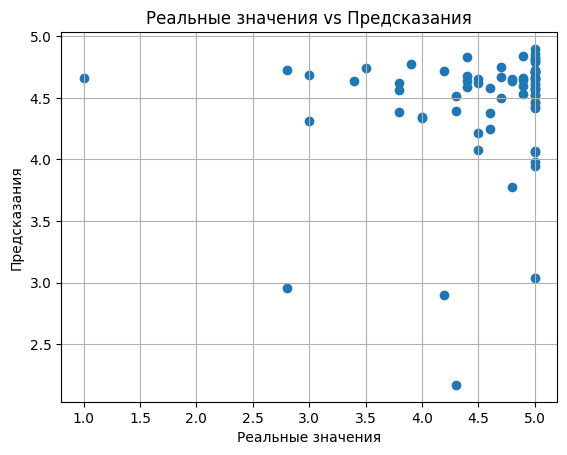

In [137]:
import matplotlib.pyplot as plt
# График зависимости между реальными значениями и предсказаниями
# Построение графика
plt.scatter(y_test, y_test_pred)
plt.grid()
plt.xlabel('Реальные значения')
plt.ylabel('Предсказания')
plt.title('Реальные значения vs Предсказания')
plt.show()

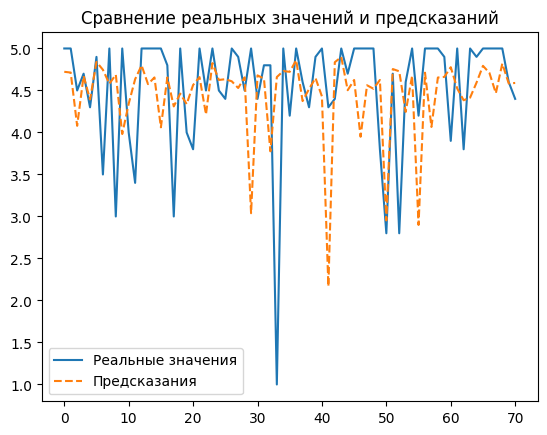

In [138]:
# График предсказаний на тестовой выборке (сравнение с реальными значениями)

plt.plot(y_test, label='Реальные значения')
plt.plot(y_test_pred, label='Предсказания', linestyle='--')
plt.legend()
plt.title('Сравнение реальных значений и предсказаний')
plt.show()

In [115]:
model.feature_importances_.shape

(962,)

In [121]:
feature_importances = list(model.feature_importances_)
len(feature_importances)

962

In [120]:
features = list(X_train_final.columns)
len(features)

962

In [122]:
features_importance_list = [{'feature':feature, 'importance_score':importance_score} for feature, importance_score in zip(features, feature_importances)]
features_importance_list[:5]

[{'feature': 'Rating Count', 'importance_score': 0.02735779105079449},
 {'feature': 'Review Count', 'importance_score': 0.05083626874927372},
 {'feature': 'а4', 'importance_score': 0.007569874959443245},
 {'feature': 'а5', 'importance_score': 0.0016373896149424545},
 {'feature': 'автор книга', 'importance_score': 0.0016080673604128425}]

In [125]:
sorted_features_importance_list = sorted(features_importance_list, key = lambda x: x['importance_score'], reverse = True)
sorted_features_importance_list[:5]

[{'feature': 'метод', 'importance_score': 0.06598578117409659},
 {'feature': 'Review Count', 'importance_score': 0.05083626874927372},
 {'feature': 'будущее', 'importance_score': 0.04254700810002791},
 {'feature': 'цвет', 'importance_score': 0.04173549293223869},
 {'feature': 'опыт', 'importance_score': 0.04015096242760506}]

In [126]:
top_50_features = sorted_features_importance_list[:50]

In [127]:
top_50_features

[{'feature': 'метод', 'importance_score': 0.06598578117409659},
 {'feature': 'Review Count', 'importance_score': 0.05083626874927372},
 {'feature': 'будущее', 'importance_score': 0.04254700810002791},
 {'feature': 'цвет', 'importance_score': 0.04173549293223869},
 {'feature': 'опыт', 'importance_score': 0.04015096242760506},
 {'feature': 'карта', 'importance_score': 0.03431745553989281},
 {'feature': 'русский язык', 'importance_score': 0.03180540617523992},
 {'feature': 'содержание', 'importance_score': 0.027417603539759344},
 {'feature': 'Rating Count', 'importance_score': 0.02735779105079449},
 {'feature': 'тело', 'importance_score': 0.024099269926707113},
 {'feature': 'книжка', 'importance_score': 0.023635412563669043},
 {'feature': 'мы', 'importance_score': 0.020664096443597558},
 {'feature': 'школа', 'importance_score': 0.015478607489264674},
 {'feature': 'пройти', 'importance_score': 0.015078431607582383},
 {'feature': 'совет', 'importance_score': 0.014154192506789325},
 {'featur